In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("customer_churn_dataset-training-master.csv")
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,Female,39,14,5,18,Standard,Annual,932.0,17.0,1.0
1,3,65,Female,49,1,10,8,Basic,Monthly,557.0,6.0,1.0
2,4,55,Female,14,4,6,18,Basic,Quarterly,185.0,3.0,1.0
3,5,58,Male,38,21,7,7,Standard,Monthly,396.0,29.0,1.0
4,6,23,Male,32,20,5,8,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20763,20772,39,Male,31,27,4,29,Basic,Quarterly,921.0,4.0,1.0
20764,20773,55,Female,40,2,7,3,Basic,Quarterly,360.0,17.0,1.0
20765,20774,58,Female,60,24,5,16,Standard,Annual,616.0,30.0,1.0
20766,20775,20,Male,58,27,8,3,Premium,Annual,920.0,29.0,1.0


In [3]:
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20768 entries, 0 to 20767
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         20768 non-null  int64  
 1   Age                20768 non-null  int64  
 2   Gender             20768 non-null  object 
 3   Tenure             20768 non-null  int64  
 4   Usage Frequency    20768 non-null  int64  
 5   Support Calls      20768 non-null  int64  
 6   Payment Delay      20768 non-null  int64  
 7   Subscription Type  20768 non-null  object 
 8   Contract Length    20768 non-null  object 
 9   Total Spend        20767 non-null  float64
 10  Last Interaction   20767 non-null  float64
 11  Churn              20767 non-null  float64
dtypes: float64(3), int64(6), object(3)
memory usage: 1.9+ MB


In [5]:
#يبقي كده عمود هيبقي (int) CustomerID   \\
# وعمود Age هيبقي (int)\\
#  وعمود Tenure هيبقي (int)\\
#  وعمود Usage Frequency هيبقي (int)\\
#  وعمود Support Calls هيبقي (int)\\
#  وعمود Payment Delay هيبقي (int)\\
#  وعمود Last Interaction هيبقي (int)\\
# وعمود Churn هيبقي (int)\\

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,1


In [8]:
missing_values = df[df['CustomerID'].isna()]
print(missing_values[['CustomerID']])


Empty DataFrame
Columns: [CustomerID]
Index: []


In [9]:
df.loc[df['CustomerID'].notna(), 'CustomerID'] = df['CustomerID'].dropna().astype(int)


In [10]:
missing_rows = df[df.isnull().any(axis=1)]  # عرض الصفوف التي تحتوي على أي قيم مفقودة
print(missing_rows)


       CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
20767       20776   57  Female      20               18              4   

       Payment Delay Subscription Type Contract Length  Total Spend  \
20767              3           Premium              Qu          NaN   

       Last Interaction  Churn  
20767               NaN    NaN  


In [11]:
df = df.dropna(how='all')


In [12]:
print(df.isnull().sum())  # لمعرفة القيم المفقودة بعد التنظيف
print(df.shape)  # لمعرفة عدد الصفوف والأعمدة المتبقية


CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64
(20768, 12)


In [13]:
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)


       CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
20767       20776   57  Female      20               18              4   

       Payment Delay Subscription Type Contract Length  Total Spend  \
20767              3           Premium              Qu          NaN   

       Last Interaction  Churn  
20767               NaN    NaN  


In [14]:
# df = df.dropna(subset=['CustomerID'])


In [15]:
df['CustomerID'].dropna().astype(int)

,CustomerID
0,2
1,3
2,4
3,5
4,6
...,...
20763,20772
20764,20773
20765,20774
20766,20775


In [16]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,1


In [17]:
df['CustomerID'] = df['CustomerID'].astype(int)
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,Female,39,14,5,18,Standard,Annual,932.0,17.0,1.0
1,3,65,Female,49,1,10,8,Basic,Monthly,557.0,6.0,1.0
2,4,55,Female,14,4,6,18,Basic,Quarterly,185.0,3.0,1.0
3,5,58,Male,38,21,7,7,Standard,Monthly,396.0,29.0,1.0
4,6,23,Male,32,20,5,8,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20763,20772,39,Male,31,27,4,29,Basic,Quarterly,921.0,4.0,1.0
20764,20773,55,Female,40,2,7,3,Basic,Quarterly,360.0,17.0,1.0
20765,20774,58,Female,60,24,5,16,Standard,Annual,616.0,30.0,1.0
20766,20775,20,Male,58,27,8,3,Premium,Annual,920.0,29.0,1.0


In [18]:
df['Age'] = df['Age'].astype(int)
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,Female,39,14,5,18,Standard,Annual,932.0,17.0,1.0
1,3,65,Female,49,1,10,8,Basic,Monthly,557.0,6.0,1.0
2,4,55,Female,14,4,6,18,Basic,Quarterly,185.0,3.0,1.0
3,5,58,Male,38,21,7,7,Standard,Monthly,396.0,29.0,1.0
4,6,23,Male,32,20,5,8,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20763,20772,39,Male,31,27,4,29,Basic,Quarterly,921.0,4.0,1.0
20764,20773,55,Female,40,2,7,3,Basic,Quarterly,360.0,17.0,1.0
20765,20774,58,Female,60,24,5,16,Standard,Annual,616.0,30.0,1.0
20766,20775,20,Male,58,27,8,3,Premium,Annual,920.0,29.0,1.0


In [19]:
df['Tenure'] = df['Tenure'].astype(int)
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,Female,39,14,5,18,Standard,Annual,932.0,17.0,1.0
1,3,65,Female,49,1,10,8,Basic,Monthly,557.0,6.0,1.0
2,4,55,Female,14,4,6,18,Basic,Quarterly,185.0,3.0,1.0
3,5,58,Male,38,21,7,7,Standard,Monthly,396.0,29.0,1.0
4,6,23,Male,32,20,5,8,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20763,20772,39,Male,31,27,4,29,Basic,Quarterly,921.0,4.0,1.0
20764,20773,55,Female,40,2,7,3,Basic,Quarterly,360.0,17.0,1.0
20765,20774,58,Female,60,24,5,16,Standard,Annual,616.0,30.0,1.0
20766,20775,20,Male,58,27,8,3,Premium,Annual,920.0,29.0,1.0


In [20]:
df['Usage Frequency']= df['Usage Frequency'].astype(int)
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,Female,39,14,5,18,Standard,Annual,932.0,17.0,1.0
1,3,65,Female,49,1,10,8,Basic,Monthly,557.0,6.0,1.0
2,4,55,Female,14,4,6,18,Basic,Quarterly,185.0,3.0,1.0
3,5,58,Male,38,21,7,7,Standard,Monthly,396.0,29.0,1.0
4,6,23,Male,32,20,5,8,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20763,20772,39,Male,31,27,4,29,Basic,Quarterly,921.0,4.0,1.0
20764,20773,55,Female,40,2,7,3,Basic,Quarterly,360.0,17.0,1.0
20765,20774,58,Female,60,24,5,16,Standard,Annual,616.0,30.0,1.0
20766,20775,20,Male,58,27,8,3,Premium,Annual,920.0,29.0,1.0


In [21]:
df['Support Calls']= df['Support Calls'].astype(int)
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,Female,39,14,5,18,Standard,Annual,932.0,17.0,1.0
1,3,65,Female,49,1,10,8,Basic,Monthly,557.0,6.0,1.0
2,4,55,Female,14,4,6,18,Basic,Quarterly,185.0,3.0,1.0
3,5,58,Male,38,21,7,7,Standard,Monthly,396.0,29.0,1.0
4,6,23,Male,32,20,5,8,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20763,20772,39,Male,31,27,4,29,Basic,Quarterly,921.0,4.0,1.0
20764,20773,55,Female,40,2,7,3,Basic,Quarterly,360.0,17.0,1.0
20765,20774,58,Female,60,24,5,16,Standard,Annual,616.0,30.0,1.0
20766,20775,20,Male,58,27,8,3,Premium,Annual,920.0,29.0,1.0


In [22]:
df['Payment Delay']= df['Payment Delay'].astype(int)
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,Female,39,14,5,18,Standard,Annual,932.0,17.0,1.0
1,3,65,Female,49,1,10,8,Basic,Monthly,557.0,6.0,1.0
2,4,55,Female,14,4,6,18,Basic,Quarterly,185.0,3.0,1.0
3,5,58,Male,38,21,7,7,Standard,Monthly,396.0,29.0,1.0
4,6,23,Male,32,20,5,8,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20763,20772,39,Male,31,27,4,29,Basic,Quarterly,921.0,4.0,1.0
20764,20773,55,Female,40,2,7,3,Basic,Quarterly,360.0,17.0,1.0
20765,20774,58,Female,60,24,5,16,Standard,Annual,616.0,30.0,1.0
20766,20775,20,Male,58,27,8,3,Premium,Annual,920.0,29.0,1.0


In [23]:
# Replace non-finite values (NaN, inf, -inf) with a suitable integer (e.g., 0) before converting to int.
df['Last Interaction'] = df['Last Interaction'].fillna(0).astype(int)

In [24]:
# Replace non-finite values (NaN, inf, -inf) with a suitable integer (e.g., 0) before converting to int.
df['Churn'] = df['Churn'].fillna(0).astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20768 entries, 0 to 20767
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         20768 non-null  int64  
 1   Age                20768 non-null  int64  
 2   Gender             20768 non-null  object 
 3   Tenure             20768 non-null  int64  
 4   Usage Frequency    20768 non-null  int64  
 5   Support Calls      20768 non-null  int64  
 6   Payment Delay      20768 non-null  int64  
 7   Subscription Type  20768 non-null  object 
 8   Contract Length    20768 non-null  object 
 9   Total Spend        20767 non-null  float64
 10  Last Interaction   20768 non-null  int64  
 11  Churn              20768 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 1.9+ MB


In [26]:
df.sample(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
10692,10701,50,Female,50,24,1,2,Standard,Quarterly,885.0,27,1
13105,13114,22,Male,39,28,2,8,Premium,Quarterly,901.0,26,0
13978,13987,27,Male,32,14,9,27,Basic,Monthly,594.0,23,1
12372,12381,63,Male,9,7,5,20,Standard,Quarterly,466.0,29,1
9513,9522,58,Female,58,15,2,16,Premium,Monthly,288.0,24,1


In [27]:
### Data Visualization & Analysis

<ipython-input-28-14b15fef1b79>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="coolwarm")


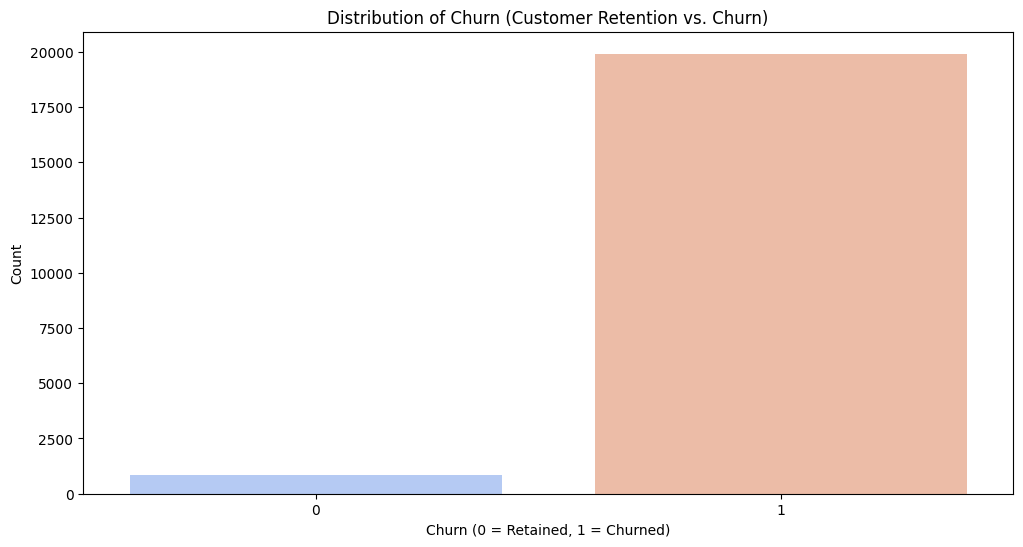

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# إعداد حجم الرسوم البيانية
plt.figure(figsize=(12, 6))

# رسم توزيع الـ Churn
sns.countplot(x="Churn", data=df, palette="coolwarm")
plt.title("Distribution of Churn (Customer Retention vs. Churn)")
plt.xlabel("Churn (0 = Retained, 1 = Churned)")
plt.ylabel("Count")
plt.show()


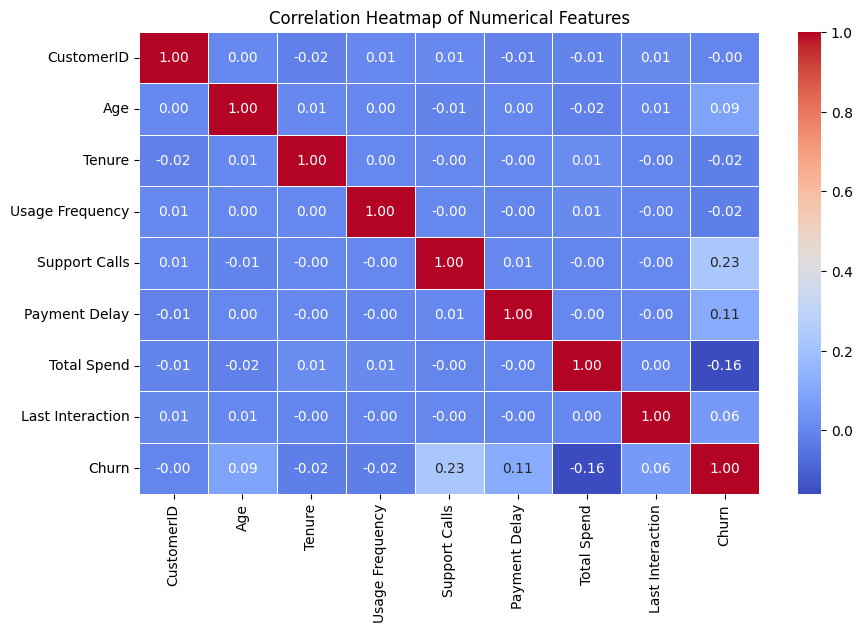

In [29]:
# إنشاء خريطة الارتباط بين المتغيرات العددية
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


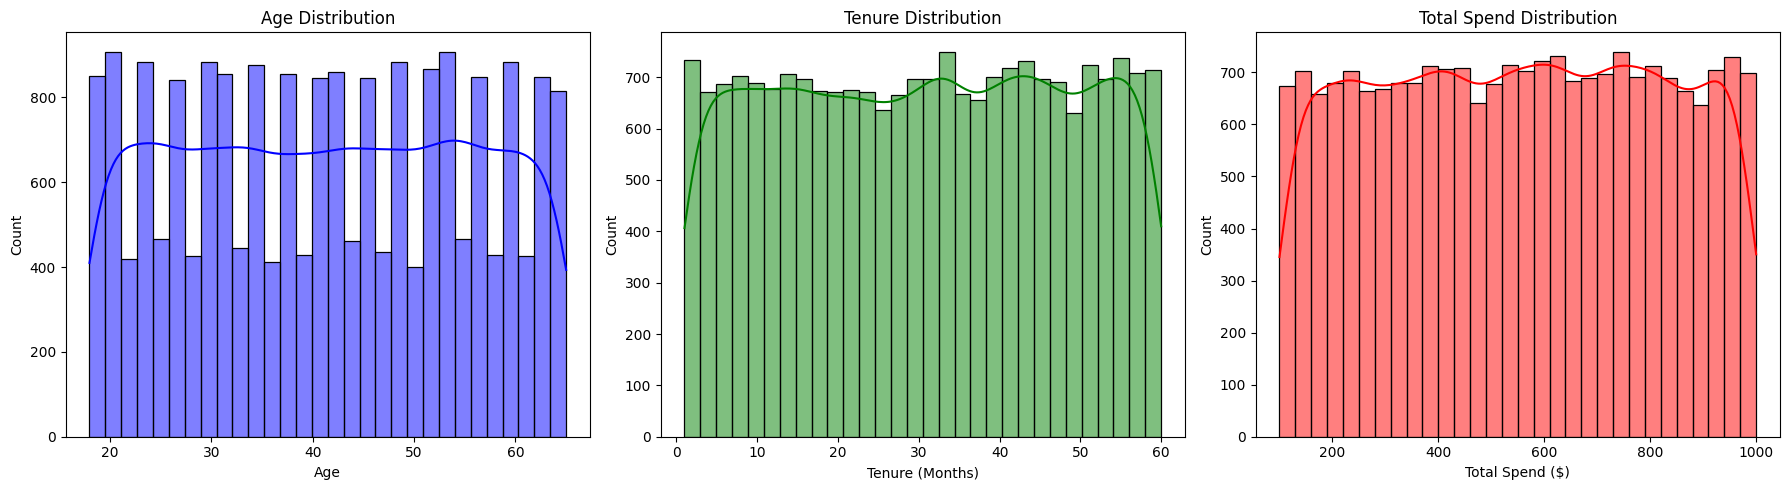

In [30]:
# إنشاء رسوم بيانية لتوزيع Age و Tenure و Total Spend

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age distribution
sns.histplot(df["Age"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Age Distribution")
axes[0].set_xlabel("Age")

# Tenure distribution
sns.histplot(df["Tenure"], bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_title("Tenure Distribution")
axes[1].set_xlabel("Tenure (Months)")

# Total Spend distribution
sns.histplot(df["Total Spend"], bins=30, kde=True, ax=axes[2], color="red")
axes[2].set_title("Total Spend Distribution")
axes[2].set_xlabel("Total Spend ($)")

plt.tight_layout()
plt.show()


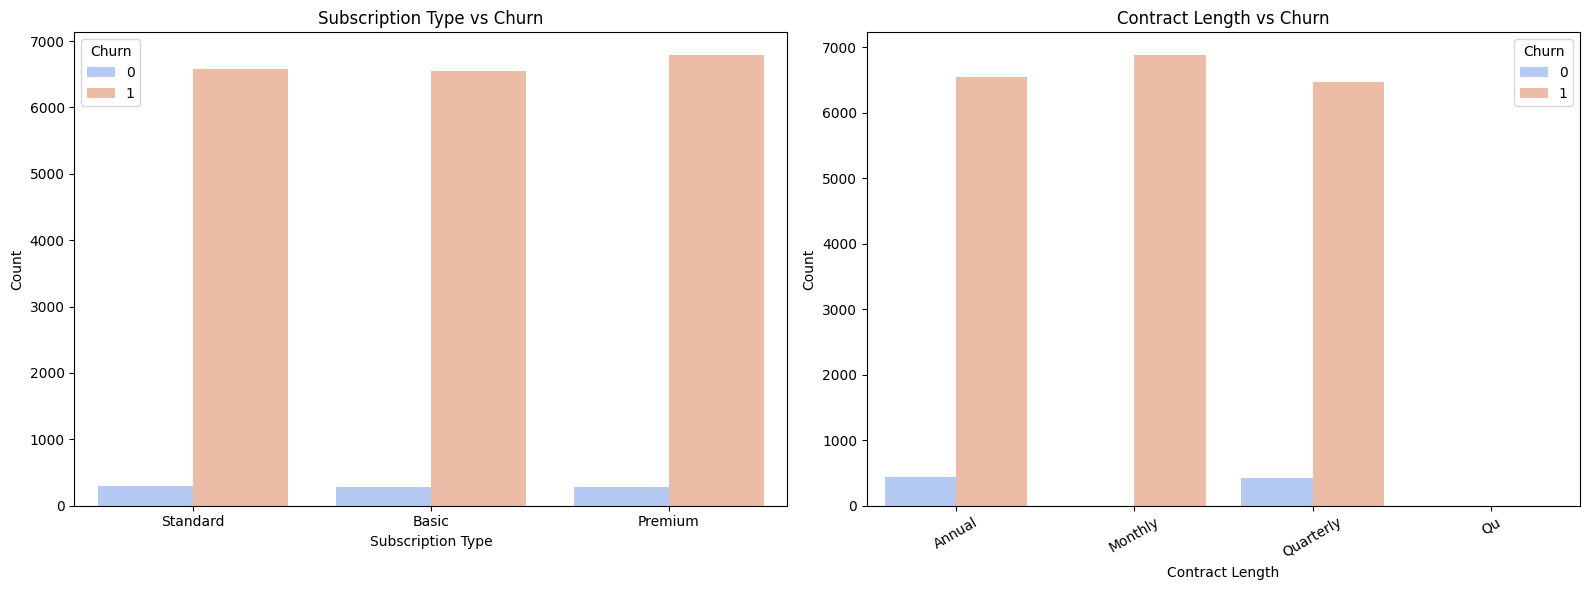

In [31]:
# إنشاء Count Plots لتوضيح العلاقة بين Subscription Type & Contract Length مع Churn

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subscription Type vs Churn
sns.countplot(x="Subscription Type", hue="Churn", data=df, palette="coolwarm", ax=axes[0])
axes[0].set_title("Subscription Type vs Churn")
axes[0].set_xlabel("Subscription Type")
axes[0].set_ylabel("Count")

# Contract Length vs Churn
sns.countplot(x="Contract Length", hue="Churn", data=df, palette="coolwarm", ax=axes[1])
axes[1].set_title("Contract Length vs Churn")
axes[1].set_xlabel("Contract Length")
axes[1].set_ylabel("Count")

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
